In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
file = 'C:\\Users\\reill\\Downloads\\Traffic_Crashes_-_Crashes.csv'
df = pd.DataFrame(pd.read_csv(file))

In [3]:
df.head()

,CRASH_RECORD_ID,CRASH_DATE_EST_I,CRASH_DATE,POSTED_SPEED_LIMIT,TRAFFIC_CONTROL_DEVICE,DEVICE_CONDITION,WEATHER_CONDITION,LIGHTING_CONDITION,FIRST_CRASH_TYPE,TRAFFICWAY_TYPE,...,INJURIES_NON_INCAPACITATING,INJURIES_REPORTED_NOT_EVIDENT,INJURIES_NO_INDICATION,INJURIES_UNKNOWN,CRASH_HOUR,CRASH_DAY_OF_WEEK,CRASH_MONTH,LATITUDE,LONGITUDE,LOCATION
0,23a79931ef555d54118f64dc9be2cf2dbf59636ce253f7...,NaN,09/05/2023 07:05:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DUSK,ANGLE,"FIVE POINT, OR MORE",...,2.0,0.0,2.0,0.0,19,3,9,NaN,NaN,NaN
1,2675c13fd0f474d730a5b780968b3cafc7c12d7adb661f...,NaN,09/22/2023 06:45:00 PM,50,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",REAR END,DIVIDED - W/MEDIAN BARRIER,...,0.0,0.0,2.0,0.0,18,6,9,NaN,NaN,NaN
2,5f54a59fcb087b12ae5b1acff96a3caf4f2d37e79f8db4...,NaN,07/29/2023 02:45:00 PM,30,TRAFFIC SIGNAL,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,PARKED MOTOR VEHICLE,DIVIDED - W/MEDIAN (NOT RAISED),...,0.0,0.0,1.0,0.0,14,7,7,41.85412,-87.665902,POINT (-87.665902342962 41.854120262952)
3,7ebf015016f83d09b321afd671a836d6b148330535d5df...,NaN,08/09/2023 11:00:00 PM,30,NO CONTROLS,NO CONTROLS,CLEAR,"DARKNESS, LIGHTED ROAD",SIDESWIPE SAME DIRECTION,NOT DIVIDED,...,0.0,0.0,2.0,0.0,23,4,8,NaN,NaN,NaN
4,6c1659069e9c6285a650e70d6f9b574ed5f64c12888479...,NaN,08/18/2023 12:50:00 PM,15,OTHER,FUNCTIONING PROPERLY,CLEAR,DAYLIGHT,REAR END,OTHER,...,1.0,0.0,1.0,0.0,12,6,8,NaN,NaN,NaN


In [4]:
df.columns

Index(['CRASH_RECORD_ID', 'CRASH_DATE_EST_I', 'CRASH_DATE',
       'POSTED_SPEED_LIMIT', 'TRAFFIC_CONTROL_DEVICE', 'DEVICE_CONDITION',
       'WEATHER_CONDITION', 'LIGHTING_CONDITION', 'FIRST_CRASH_TYPE',
       'TRAFFICWAY_TYPE', 'LANE_CNT', 'ALIGNMENT', 'ROADWAY_SURFACE_COND',
       'ROAD_DEFECT', 'REPORT_TYPE', 'CRASH_TYPE', 'INTERSECTION_RELATED_I',
       'NOT_RIGHT_OF_WAY_I', 'HIT_AND_RUN_I', 'DAMAGE', 'DATE_POLICE_NOTIFIED',
       'PRIM_CONTRIBUTORY_CAUSE', 'SEC_CONTRIBUTORY_CAUSE', 'STREET_NO',
       'STREET_DIRECTION', 'STREET_NAME', 'BEAT_OF_OCCURRENCE',
       'PHOTOS_TAKEN_I', 'STATEMENTS_TAKEN_I', 'DOORING_I', 'WORK_ZONE_I',
       'WORK_ZONE_TYPE', 'WORKERS_PRESENT_I', 'NUM_UNITS',
       'MOST_SEVERE_INJURY', 'INJURIES_TOTAL', 'INJURIES_FATAL',
       'INJURIES_INCAPACITATING', 'INJURIES_NON_INCAPACITATING',
       'INJURIES_REPORTED_NOT_EVIDENT', 'INJURIES_NO_INDICATION',
       'INJURIES_UNKNOWN', 'CRASH_HOUR', 'CRASH_DAY_OF_WEEK', 'CRASH_MONTH',
       'LATITUDE', 

<Axes: xlabel='LONGITUDE', ylabel='LATITUDE'>

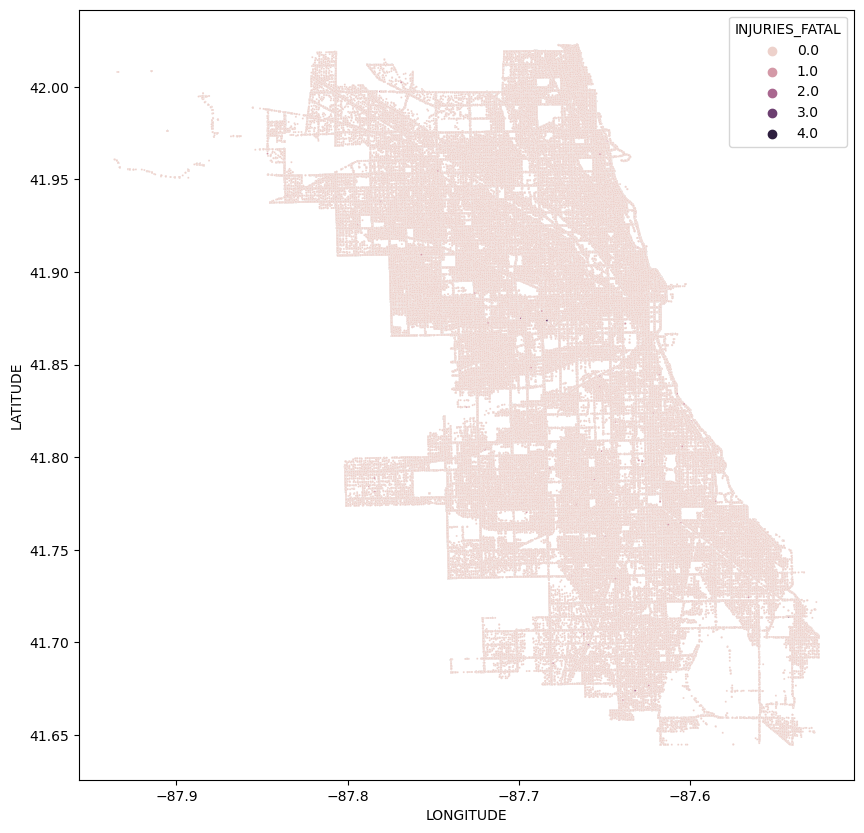

In [5]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.scatterplot(data=df[df['LONGITUDE']!=0], x='LONGITUDE', y='LATITUDE', s=2, hue='INJURIES_FATAL')

In [6]:
df['INJURIES_FATAL'].value_counts()

0.0    792339
1.0       814
2.0        53
3.0         8
4.0         1
Name: INJURIES_FATAL, dtype: int64

In [7]:
df.groupby('WEATHER_CONDITION').count()['CRASH_RECORD_ID']

WEATHER_CONDITION
BLOWING SAND, SOIL, DIRT         7
BLOWING SNOW                   404
CLEAR                       624964
CLOUDY/OVERCAST              23458
FOG/SMOKE/HAZE                1222
FREEZING RAIN/DRIZZLE         1453
OTHER                         2467
RAIN                         69694
SEVERE CROSS WIND GATE         149
SLEET/HAIL                     948
SNOW                         26895
UNKNOWN                      43295
Name: CRASH_RECORD_ID, dtype: int64

<Axes: xlabel='INJURIES_TOTAL', ylabel='PRIM_CONTRIBUTORY_CAUSE'>

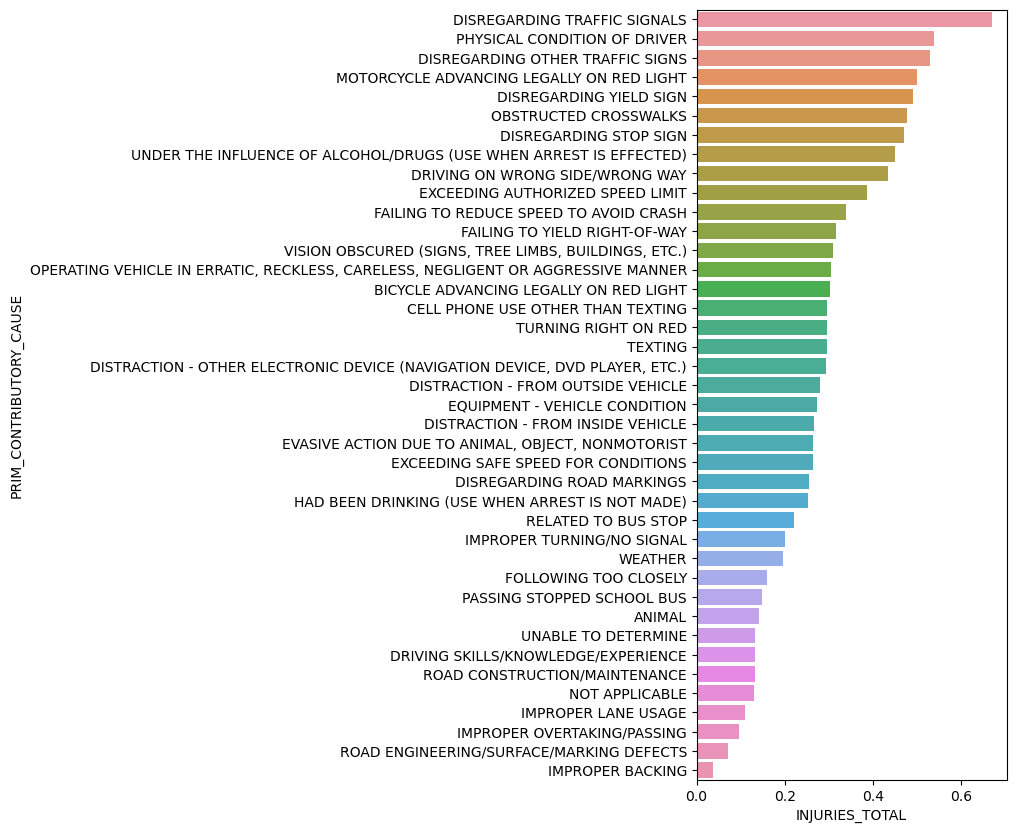

In [8]:
fig, ax = plt.subplots(figsize=(4, 10))
order = df.groupby('PRIM_CONTRIBUTORY_CAUSE')['INJURIES_TOTAL'].mean().sort_values(ascending=False)
sns.barplot(data=df, y='PRIM_CONTRIBUTORY_CAUSE', x='INJURIES_TOTAL', errorbar=None, order=order.index)

<Axes: xlabel='INJURIES_TOTAL', ylabel='FIRST_CRASH_TYPE'>

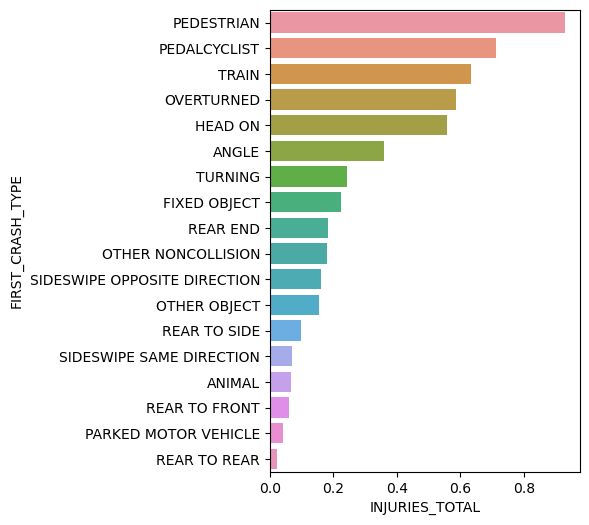

In [12]:
fig, ax = plt.subplots(figsize=(4, 6))
order = df.groupby('FIRST_CRASH_TYPE')['INJURIES_TOTAL'].mean().sort_values(ascending=False)
sns.barplot(data=df, y='FIRST_CRASH_TYPE', x='INJURIES_TOTAL', errorbar=None, order=order.index)